## Transformations of random variables

If $x$ is a random variable then $f(x)$ is also a random variable for any function $f$.

To transform probability distributions when taking functions of random variables, we can simply use conservation of dimensionless probability, i.e. 

$$\mathrm{Prob}(x, x+dx) = \mathrm{Prob}(y, y+dy)$$

$$p(x)dx = p(y)dy.$$ 

where $y = f(x)$.

Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x)$$

**EXAMPLE**

* Let $x$ be a random variable drawn from a uniform distribution between $0$ and $1$. So $p(x) = 1/(1-0) = 1$.  
* Let's transform to $y = e^x$.
* So $p(y) = \left|dy/dx\right|^{-1}p(x) = 1/y$

![https://www.astroml.org/_images/fig_transform_distribution_1.png](https://www.astroml.org/_images/fig_transform_distribution_1.png)

### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

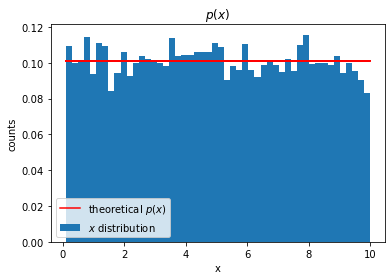

In [51]:
N = 10000 # number of samples

# x limits
x_min = 0.1
x_max = 10
# random sampling
x = np.random.uniform(x_min,x_max,N) 

# theoretical pdf of x
p_x = 1/(x_max-x_min)

# plot 
plt.hist(x,density=True,bins=50,label=r'$x$ distribution')
plt.plot(x,[p_x]*N,color='red',label=r'theoretical $p(x)$')

plt.xlabel(r'x')
plt.ylabel('counts')
plt.title(r'$p(x)$')
plt.legend()
plt.show()

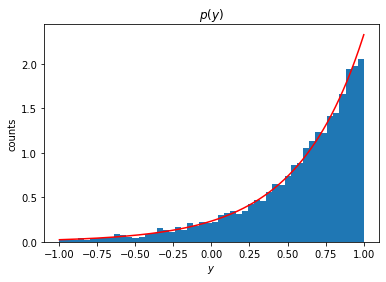

In [52]:
y = np.log10(x) # compute the log in base 10 of x

# theoretical pdf of y
p_y = (10**y)*np.log(10)*p_x

#plot
plt.hist(y,density=True,bins=50,label=r'$y$ distribution')
plt.plot(np.sort(y),p_y[np.argsort(y)],color='red',label=r'theoretical $p(y)$')
plt.title(r'$p(y)$')
plt.xlabel(r'$y$')
plt.ylabel('counts')
plt.show()

In [54]:
# Compute the log of the mean of x and the mean of y. 
log_mean_x = np.log10(np.mean(x))
mean_y = np.mean(y)

print('log(mean(x)): %.2f ; mean(y): %.2f'%(log_mean_x,mean_y))

# Now compute the log of the median of x and the median of y. 
log_median_x = np.log10(np.median(x))
median_y = np.median(y)

print('log(median(x)): %.2f ; median(y): %.2f'%(log_median_x,median_y))

log(mean(x)): 0.70 ; mean(y): 0.58
log(median(x)): 0.70 ; median(y): 0.70


You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.